

### **K-Means++ Clustering**


In [ ]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 87kB/s 
     |████████████████████████████████| 204kB 70.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=c9db604047630e81b2e5da1806043ab6f09a2bbcfaac1a1344ee9fa5b7a79dd0
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data file
file = "drive/My Drive/bigdata_assignments/projects/project-3/data.txt"

In [ ]:
#importing the required packages
import sys
from pyspark import SparkContext, SparkConf
import numpy as np
import random
import matplotlib as mplib
import matplotlib.pyplot as pl

In [ ]:
#initializing the sparkcontext
sparkcontext = SparkContext("local","PySpark k-means clustering")

In [ ]:
#constants required
total_iteration = 20
k = 10

In [ ]:
#reading the data file & splitting them using space
fileRDD = sparkcontext.textFile(file)
itemset = fileRDD.map(lambda line: [item for item in line.split(' ')])
itemsetNew = itemset.map(lambda x: [float(i) for i in x])

In [ ]:
#initializing the 10 centroids
def initCentroidsKpp(data, numClusters):
  #initializing 1st centroid randomly
  centroids = data.takeSample(False, 1)
  dataArray = data.collect()
  while len(centroids) < numClusters:
    #fetching the farthest cluster centroid
    D2 = calculateDistace(dataArray, centroids)
    #choosing the new cluster centroid with probability D2
    centroids.append(chooseNextCentroid(D2, dataArray))
  return centroids

In [ ]:
#function to fetch the farthest cluster centroid
def calculateDistace(centroid,dataPoint):
  distance = list()
  for j in dataPoint:
    d = 0
    for i in centroid:
      d = max(d,calculateDistanceKPP(i,j))
    distance.append(d)
  return distance

In [ ]:
#calculating distance using squared eucledian distance
def calculateDistanceKPP(a,b):
  finalans = 0
  for x,y in zip(a,b):
    ans  =  (x-y)
    finalans = finalans+(ans*ans)
  return finalans

In [ ]:
#choosing the new cluster centroid with probability Di
def chooseNextCentroid(distance,dataArray):
  d = np.array(distance)
  #calculating the probabilities of each distance
  #probabilities will always be in between 0-1
  prob = d/d.sum()
  #we can't take a random value from prob list as different data points have differet weights, to normalize the probability weights we are 
  #considering the cumulative probabilities
  cumprob = prob.cumsum()
  #pick a random value between 0-1
  r = random.random()
  #choose the centroid index with probability as r <= cumprob[i]
  ci = 0
  key =0
  for k,i in enumerate(cumprob):
    if r <= i:
      ci = i
      key = k
  centroid = dataArray[key]
  return centroid

In [ ]:
#initializing the centroids
centroids = initCentroidsKpp(itemsetNew,10) 

In [ ]:
print("Generated Centroids")
for i in centroids:
  print(i)

Generated Centroids
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.94, 0.0, 0.0, 0.0, 0.0, 2.94, 0.0, 2.94, 0.0, 0.0, 0.0, 0.0, 0.0, 2.94, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.94, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 10.0, 0.0]
[0.0, 0.64, 0.64, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.32, 0.0, 1.29, 1.93, 0.0, 0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.778, 0.0, 0.0, 3.756, 61.0, 278.0, 1.0]
[0.21, 0.28, 0.5, 0.0, 0.14, 0.28, 0.21, 0.07, 0.0, 0.94, 0.21, 0.79, 0.65, 0.21, 0.14, 0.14, 0.07, 0.28, 3.47, 0.0, 1.59, 0.0, 0.43, 0.43, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.372, 0.18, 0.048, 5.114, 101.0, 1028.0, 1.0]
[0.06, 0.0, 0.71, 0.0, 1.23, 0.19, 0.19, 0.12, 0.64,

In [ ]:
#computing the euclidean distance
def compute_euclidean_distance(a, b):
    sum_of = 0
    for x, y in zip(a, b):
        ans = (x - y)**2
        sum_of += ans
    return (sum_of)**(1/2)

In [ ]:
#computing the manhattan distance
def compute_manhattan_distance(a, b):
    sum_of = 0
    for x, y in zip(a, b):
        ans = abs(x-y)
        sum_of += ans
    return (sum_of)**(1/2)

In [ ]:
#assign the cluster which has the minimum distance
def assign_label_cluster(distance, data_point, centroids):
  #getting the minimum distance cluster from the dictionary
  minIndex = min(distance, key=distance.get)
  return [minIndex, data_point, distance[minIndex]]

In [ ]:
#computing new centroids
def compute_new_centroid(label,centroids):
  res = []
  for j in range(0,10):
    c = []
    x = None
    for i in label:
      if i[0] == j:
        c.append(np.array(i[1]))
    if not c:
      x = centroids[j]
    else:
      x = np.average(c,axis = 0)
    res.append(x)
  return res        

In [ ]:
#k-meansPP clustering
def iterative_kmeansPP_clustering_Eucledian(data_points,centroids):
  #length of the datapoints
  datalength = len(data_points)
  #array to store cost function values
  CostFunArrayEucledian = np.zeros((total_iteration,2))
  #dictionary to store the costfunction for an iteration
  costDictEucledian = dict()
  #constant which keeps the iteration number
  iter_no = 0
  while iter_no < total_iteration:
    #has datapoints and corresponding cluster number
    cluster_label = []
    #incrementing the iteration
    iter_no += 1
    #initializing the summation value for each iteration
    s = 0
    #iterating the datapoints
    for r in range(0, datalength):
      #dictionary to store corresponding distances between k centroids and current data point
      distance = {}
      #for each centroid
      for c in range(0, k):
        distance[c] = compute_euclidean_distance(data_points[r], centroids[c])
      #assigning the cluster to a smallest distance
      label = assign_label_cluster(distance, data_points[r], centroids)
      cluster_label.append(label)
      #updating the summation value
      s = s + (label[2]**2)
    #adding the cost function for an iteration
    costDictEucledian[iter_no] = s  
    CostFunArrayEucledian[iter_no-1,:] = np.array([iter_no, s])
    print("Iteration %.1d : %.2f" %(iter_no,s))
    new_centroids = compute_new_centroid(cluster_label,centroids)
    centroids = new_centroids
  return CostFunArrayEucledian,costDictEucledian

In [ ]:
[costFunArrayEucledian,costDictEucledian] = iterative_kmeansPP_clustering_Eucledian(itemsetNew.collect(),centroids)

Iteration 1 : 641192406.19
Iteration 2 : 521019884.75
Iteration 3 : 492434577.70
Iteration 4 : 470323302.43
Iteration 5 : 465825142.88
Iteration 6 : 464263115.51
Iteration 7 : 463213910.73
Iteration 8 : 462437198.15
Iteration 9 : 461987288.10
Iteration 10 : 461511800.04
Iteration 11 : 461180366.83
Iteration 12 : 460960771.22
Iteration 13 : 460762543.69
Iteration 14 : 460484680.92
Iteration 15 : 460246659.85
Iteration 16 : 460027072.82
Iteration 17 : 459754240.42
Iteration 18 : 459454136.62
Iteration 19 : 459038803.74
Iteration 20 : 458546879.18


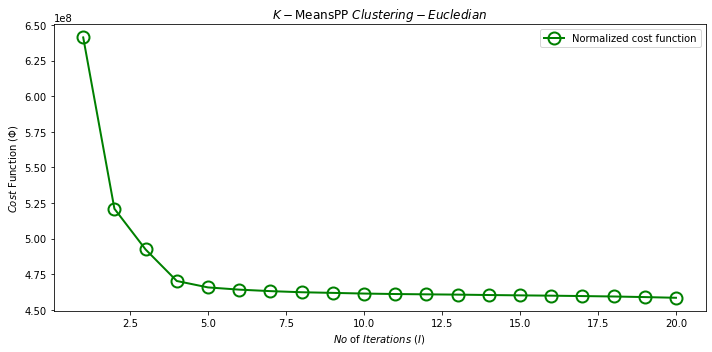

In [ ]:
figure1, axes1 = pl.subplots(1,1,figsize=(10,5)) # Specifying the dimensions of graph
# In the below step we assign a line plot for the iterations and the cost function
axes1.plot(costFunArrayEucledian[:,0], costFunArrayEucledian[:,1], 'go-', linewidth = 2, markersize = 12, markeredgewidth = 2, label = 'Normalized cost function', fillstyle = 'none')
axes1.set_xlabel("$No$ of $Iterations$ $(I)$") # Setting the x-label to no.of iterations
axes1.set_ylabel("$Cost$ Function $(Φ)$") # Setting the y-label to cost function of eucledian
axes1.set_title("$K-$MeansPP $Clustering-Eucledian$") # Assigning the title for the graph
axes1.legend(loc=0)
figure1.tight_layout() # Adjusts the graph to a tight layout
pl.show() # Displays the plot

In [ ]:
#k-means clustering
def iterative_kmeansPP_clustering_Manhattan(data_points,centroids):
  #length of the datapoints
  datalength = len(data_points)
  #array to store cost function values
  CostFunArrayManhattan = np.zeros((total_iteration,2))
  #dictionary to store the costfunction for an iteration
  costDictManhattan = dict()
  #constant which keeps the iteration number
  iter_no = 0
  while iter_no < total_iteration:
    #has datapoints and corresponding cluster number
    cluster_label = []
    #incrementing the iteration
    iter_no += 1
    #initializing the summation value for each iteration
    s = 0
    #iterating the datapoints
    for r in range(0, datalength):
      #dictionary to store corresponding distances between k centroids and current data point
      distance = {}
      #for each centroid
      for c in range(0, k):
        distance[c] = compute_manhattan_distance(data_points[r], centroids[c])
      #assigning the cluster to a smallest distance
      label = assign_label_cluster(distance, data_points[r], centroids)
      cluster_label.append(label)
      #updating the summation value
      s = s + (label[2]**2)
    #adding the cost function for an iteration
    costDictManhattan[iter_no] = s  
    CostFunArrayManhattan[iter_no-1,:] = np.array([iter_no, s])
    print("Iteration %.1d : %.2f" %(iter_no,s))
    new_centroids = compute_new_centroid(cluster_label,centroids)
    centroids = new_centroids
  return CostFunArrayManhattan,costDictManhattan

In [ ]:
[CostFunArrayManhattan,costDictManhattan] = iterative_kmeansPP_clustering_Manhattan(itemsetNew.collect(),centroids)

Iteration 1 : 570066.96
Iteration 2 : 493376.54
Iteration 3 : 482478.71
Iteration 4 : 488999.29
Iteration 5 : 494276.85
Iteration 6 : 498583.62
Iteration 7 : 501647.63
Iteration 8 : 500716.83
Iteration 9 : 495727.60
Iteration 10 : 492450.68
Iteration 11 : 483308.54
Iteration 12 : 480260.43
Iteration 13 : 462248.79
Iteration 14 : 443375.87
Iteration 15 : 443718.60
Iteration 16 : 441784.08
Iteration 17 : 442535.58
Iteration 18 : 443251.94
Iteration 19 : 444690.21
Iteration 20 : 445811.40


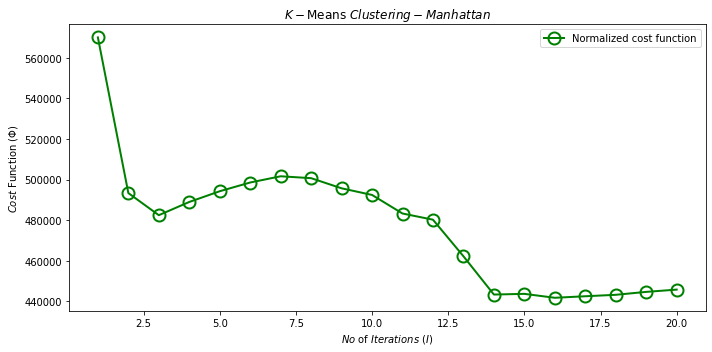

In [ ]:
figure1, axes1 = pl.subplots(1,1,figsize=(10,5)) # Specifying the dimensions of graph
# In the below step we assign a line plot for the iterations and the cost function
axes1.plot(CostFunArrayManhattan[:,0], CostFunArrayManhattan[:,1], 'go-', linewidth = 2, markersize = 12, markeredgewidth = 2, label = 'Normalized cost function', fillstyle = 'none')
axes1.set_xlabel("$No$ of $Iterations$ $(I)$") # Setting the x-label to no.of iterations
axes1.set_ylabel("$Cost$ Function $(Φ)$") # Setting the y-label to cost function of eucledian
axes1.set_title("$K-$Means $ClusteringPP-Manhattan$") # Assigning the title for the graph
axes1.legend(loc=0)
figure1.tight_layout() # Adjusts the graph to a tight layout
pl.show() # Displays the plot

In [ ]:
#printing the cost functions
print(costDictEucledian)
print(costDictManhattan)

{1: 641192406.191456, 2: 521019884.7465849, 3: 492434577.6966145, 4: 470323302.42858905, 5: 465825142.87586796, 6: 464263115.5113963, 7: 463213910.72997636, 8: 462437198.1519033, 9: 461987288.10075015, 10: 461511800.0395442, 11: 461180366.8259121, 12: 460960771.2189678, 13: 460762543.68501323, 14: 460484680.92386293, 15: 460246659.84888494, 16: 460027072.8171338, 17: 459754240.4221598, 18: 459454136.616111, 19: 459038803.7434591, 20: 458546879.18303794}
{1: 570066.9610000009, 2: 493376.5356420899, 3: 482478.7070966571, 4: 488999.293673151, 5: 494276.85248770023, 6: 498583.61778867885, 7: 501647.6336193956, 8: 500716.8319284021, 9: 495727.60073583963, 10: 492450.67800282163, 11: 483308.5425133581, 12: 480260.42705542105, 13: 462248.7932002501, 14: 443375.8669591847, 15: 443718.60350163793, 16: 441784.084028143, 17: 442535.5826070704, 18: 443251.93974944553, 19: 444690.2144626764, 20: 445811.4008976145}


In [ ]:
# cost function for eucledian distance
costEucledianPercentage = ((costDictEucledian[1] - costDictEucledian[10])/(costDictEucledian[1])) * 100
costEucledianPercentage

28.022884303820067

In [ ]:
# cost function for manhattan distance
costManhattanPercentage = ((costDictManhattan[1] - costDictManhattan[10])/(costDictManhattan[1])) * 100
costManhattanPercentage

13.615292291457525

##**Performance of K-means & k-meansPP clustering algorithms**

Cost Percentages of all the four Algorithms:
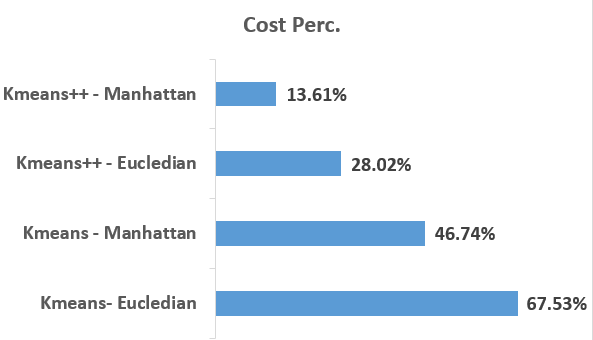



Cost percentages of k-means are higher than that of K-means++ for both Eucledian & Manhattan distances. This is because the cost functions of K-means++ are very low which resulted in lower cost percentages. Hence, the cost percentages is not an accurate metric to compare algorithms here.


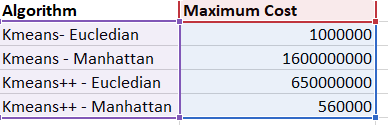


We can clearly tell that performance of k-means++ is better compared to k-means from the cost functions. K-means++ max cost functions are almost 1/10 th of the K-means.Reason being centroids are not randomly initialized instead they are picked based on the probability of the distance.



###**PARTICIPATION REPORT**

##Sindhu Sheri
initializing centroids & eucledian distance measure for K-means,k-means++
##Tarun Alapati
Manhattan Distance Measure & cost functions for K-means,k-means++
##Team Work
Before starting off with the project, we discussed how we wanted to proceed. Also while implementating we were keeping track of each other to know if we were going in right direction.
Once the implementation is complemented, we discussed about the performance of algorithms & included it.